<a href="https://colab.research.google.com/github/SuryARavichan/HIERARCHICAL-CLUSTERING/blob/main/hierarchical_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv('mpg.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [9]:
df_w_dummies = pd.get_dummies(df.drop('name',axis=1))

In [10]:
df_w_dummies

,mpg,cylinders,displacement,weight,acceleration,model_year,origin,horsepower_100,horsepower_102,horsepower_103,horsepower_105,horsepower_107,horsepower_108,horsepower_110,horsepower_112,horsepower_113,horsepower_115,horsepower_116,horsepower_120,horsepower_122,horsepower_125,horsepower_129,horsepower_130,horsepower_132,horsepower_133,horsepower_135,horsepower_137,horsepower_138,horsepower_139,horsepower_140,horsepower_142,horsepower_145,horsepower_148,horsepower_149,horsepower_150,horsepower_152,horsepower_153,horsepower_155,horsepower_158,horsepower_160,...,horsepower_58,horsepower_60,horsepower_61,horsepower_62,horsepower_63,horsepower_64,horsepower_65,horsepower_66,horsepower_67,horsepower_68,horsepower_69,horsepower_70,horsepower_71,horsepower_72,horsepower_74,horsepower_75,horsepower_76,horsepower_77,horsepower_78,horsepower_79,horsepower_80,horsepower_81,horsepower_82,horsepower_83,horsepower_84,horsepower_85,horsepower_86,horsepower_87,horsepower_88,horsepower_89,horsepower_90,horsepower_91,horsepower_92,horsepower_93,horsepower_94,horsepower_95,horsepower_96,horsepower_97,horsepower_98,horsepower_?
0,18.0,8,307.0,3504,12.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,3693,11.5,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,3436,11.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,3433,12.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,3449,10.5,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,2130,24.6,82,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
395,32.0,4,135.0,2295,11.6,82,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,2625,18.6,82,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scalar = MinMaxScaler()

In [13]:
scaled_data = scalar.fit_transform(df_w_dummies)

In [14]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        0.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        0.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        0.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        0.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        0.        ]])

In [15]:
scaled_df = pd.DataFrame(scaled_data,columns=df_w_dummies.columns)

In [16]:
scaled_df

,mpg,cylinders,displacement,weight,acceleration,model_year,origin,horsepower_100,horsepower_102,horsepower_103,horsepower_105,horsepower_107,horsepower_108,horsepower_110,horsepower_112,horsepower_113,horsepower_115,horsepower_116,horsepower_120,horsepower_122,horsepower_125,horsepower_129,horsepower_130,horsepower_132,horsepower_133,horsepower_135,horsepower_137,horsepower_138,horsepower_139,horsepower_140,horsepower_142,horsepower_145,horsepower_148,horsepower_149,horsepower_150,horsepower_152,horsepower_153,horsepower_155,horsepower_158,horsepower_160,...,horsepower_58,horsepower_60,horsepower_61,horsepower_62,horsepower_63,horsepower_64,horsepower_65,horsepower_66,horsepower_67,horsepower_68,horsepower_69,horsepower_70,horsepower_71,horsepower_72,horsepower_74,horsepower_75,horsepower_76,horsepower_77,horsepower_78,horsepower_79,horsepower_80,horsepower_81,horsepower_82,horsepower_83,horsepower_84,horsepower_85,horsepower_86,horsepower_87,horsepower_88,horsepower_89,horsepower_90,horsepower_91,horsepower_92,horsepower_93,horsepower_94,horsepower_95,horsepower_96,horsepower_97,horsepower_98,horsepower_?
0,0.239362,1.0,0.617571,0.536150,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.159574,1.0,0.728682,0.589736,0.208333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.239362,1.0,0.645995,0.516870,0.178571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.186170,1.0,0.609819,0.516019,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.212766,1.0,0.604651,0.520556,0.148810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.333711,0.452381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,0.930851,0.2,0.074935,0.146583,0.988095,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
395,0.611702,0.2,0.173127,0.193365,0.214286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

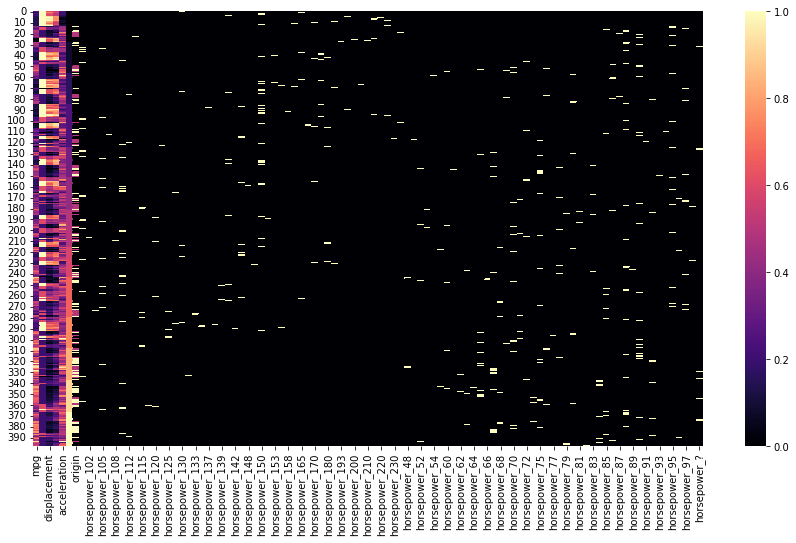

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_df,cmap='magma')

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1080x576 with 0 Axes>

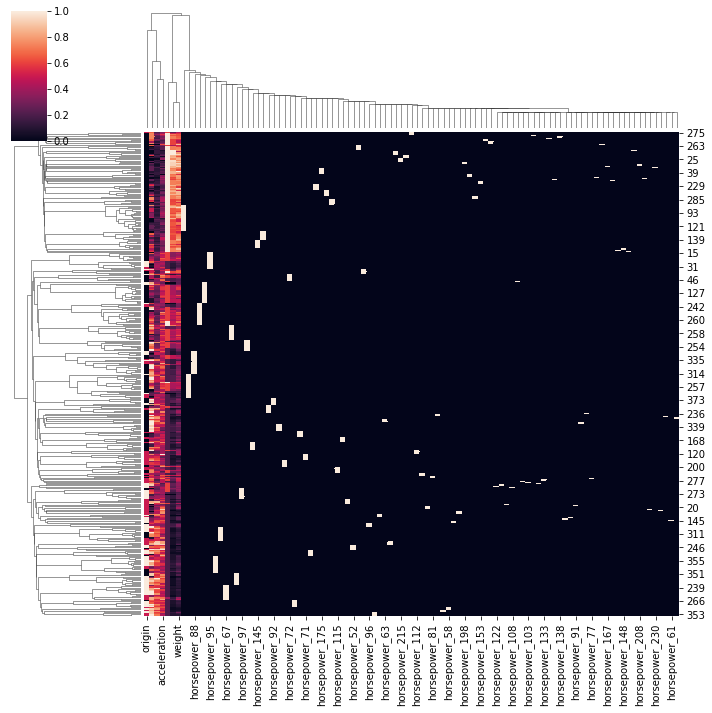

In [18]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1080x576 with 0 Axes>

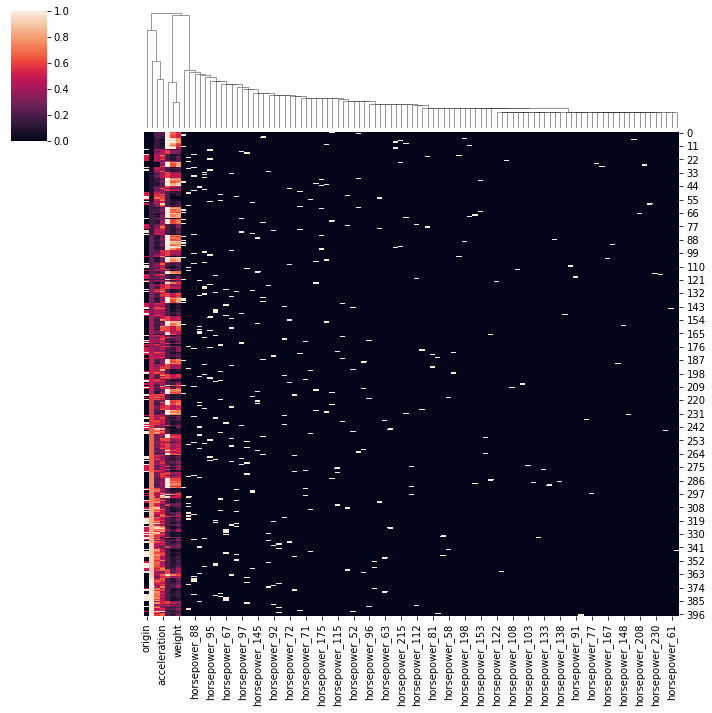

In [19]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df,row_cluster=False)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1080x576 with 0 Axes>

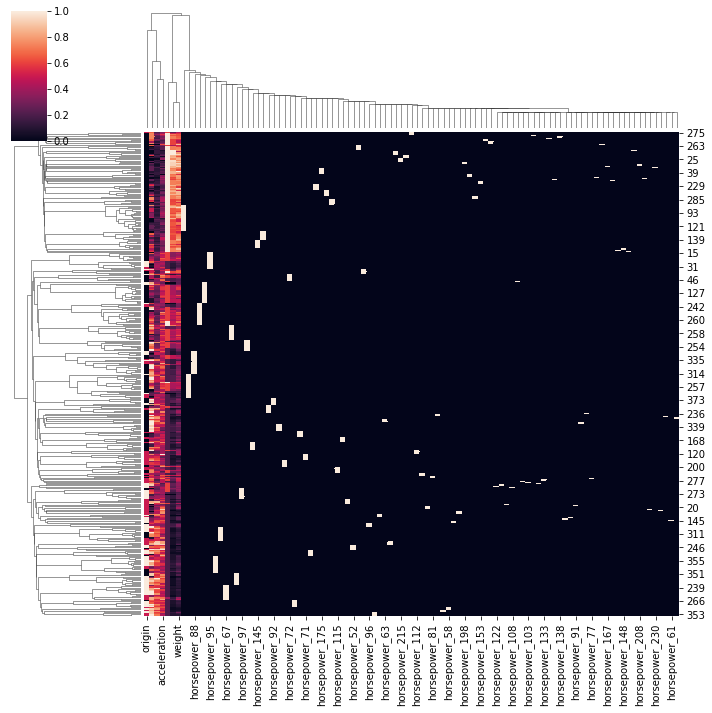

In [20]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df,row_cluster=True)

In [21]:
len(df)

398

In [22]:
scaled_df.corr()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin,horsepower_100,horsepower_102,horsepower_103,horsepower_105,horsepower_107,horsepower_108,horsepower_110,horsepower_112,horsepower_113,horsepower_115,horsepower_116,horsepower_120,horsepower_122,horsepower_125,horsepower_129,horsepower_130,horsepower_132,horsepower_133,horsepower_135,horsepower_137,horsepower_138,horsepower_139,horsepower_140,horsepower_142,horsepower_145,horsepower_148,horsepower_149,horsepower_150,horsepower_152,horsepower_153,horsepower_155,horsepower_158,horsepower_160,...,horsepower_58,horsepower_60,horsepower_61,horsepower_62,horsepower_63,horsepower_64,horsepower_65,horsepower_66,horsepower_67,horsepower_68,horsepower_69,horsepower_70,horsepower_71,horsepower_72,horsepower_74,horsepower_75,horsepower_76,horsepower_77,horsepower_78,horsepower_79,horsepower_80,horsepower_81,horsepower_82,horsepower_83,horsepower_84,horsepower_85,horsepower_86,horsepower_87,horsepower_88,horsepower_89,horsepower_90,horsepower_91,horsepower_92,horsepower_93,horsepower_94,horsepower_95,horsepower_96,horsepower_97,horsepower_98,horsepower_?
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,-0.106087,-0.022596,-0.020668,-0.068090,-0.016167,-0.029026,-0.102636,-0.042959,0.015980,0.017707,0.012122,-0.063758,-0.022596,-0.042214,-0.074785,-0.120141,0.059056,-0.047028,-0.034169,-0.061173,-0.045099,-0.039735,-0.122927,-0.051529,-0.138108,-0.061173,-0.048314,-0.272997,-0.057958,-0.086620,-0.077971,-0.067602,-0.095724,...,0.127778,0.124922,0.054556,0.093183,0.121526,0.099561,0.246079,0.080916,0.227612,0.137389,0.103292,0.202390,0.079550,-0.024268,0.111851,0.135049,0.097264,0.012122,0.052070,0.031731,0.087167,0.008971,0.048126,0.059509,0.104899,-0.000933,0.009904,-0.004685,0.044870,0.012765,0.024765,-0.022596,0.065277,0.015980,-0.009738,-0.034251,0.040772,-0.027130,-0.029721,0.071088
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,0.031222,-0.042977,-0.013435,0.039289,0.016107,0.016107,0.062732,-0.040429,-0.042977,-0.016915,0.016107,0.061992,0.016107,0.096367,0.106472,0.168988,0.016107,0.016107,0.075192,0.075192,0.075192,0.106472,0.200460,0.075192,0.200460,0.075192,0.075192,0.362397,0.075192,0.106472,0.106472,0.075192,0.106472,...,-0.060856,-0.096588,-0.042977,-0.060856,-0.074627,-0.042977,-0.137474,-0.042977,-0.142336,-0.105942,-0.074627,-0.150985,-0.096588,-0.057393,-0.074627,-0.163506,-0.056627,-0.013435,-0.081668,-0.060856,-0.114577,-0.019024,-0.042977,-0.086282,-0.105942,-0.010873,-0.096588,-0.060856,-0.136239,-0.042977,-0.095424,-0.042977,-0.105942,-0.042977,-0.042977,-0.051113,-0.074627,-0.080510,-0.019024,-0.081668
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,0.052829,-0.030567,-0.030085,0.064746,-0.018519,-0.018037,0.045669,-0.029646,-0.034905,-0.032088,-0.012254,0.024744,-0.018037,0.055713,0.074094,0.120415,-0.012254,-0.014663,0.060037,0.052326,0.075941,0.074094,0.145924,0.075941,0.178779,0.075941,0.075941,0.315751,0.075941,0.107533,0.106850,0.075941,0.103438,...,-0.078087,-0.110723,-0.053219,-0.071263,-0.075952,-0.051773,-0.166995,-0.045989,-0.163965,-0.117525,-0.089621,-0.169609,-0.099892,-0.026444,-0.069815,-0.158464,-0.077815,-0.005025,-0.075747,-0.057614,-0.103793,-0.024176,-0.035869,-0.081444,-0.066243,-0.011171,-0.076713,-0.053520,-0.107286,-0.025748,-0.060247,-0.038278,-0.069807,-0.041170,-0.041170,-0.049762,-0.050289,-0.090531,-0.005409,-0.076539
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,0.043468,0.010656,-0.008333,0.084202,-0.029577,-0.002399,0.080892,-0.009455,-0.043700,-0.022568,-0.004179,0.066723,-0.009698,0.059548,0.040045,0.126824,-0.003586,0.026084,0.051007,0.063587,0.058425,0.035045,0.175353,0.064300,0.163104,0.100082,0.080974,0.304647,0.073853,0.098400,0.122726,0.082636,0.089241,...,-0.099186,-0.142061,-0.057407,-0.085952,-0.086563,-0.065003,-0.179588,-0.069453,-0.166117,-0.134271,-0.102328,-0.189309,-0.098665,-0.038240,-0.072344

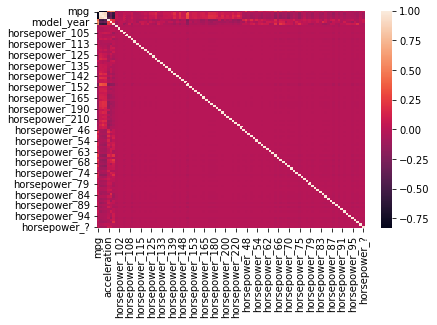

In [23]:
sns.heatmap(scaled_df.corr())

In [24]:
len(df_w_dummies)


398

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
model = AgglomerativeClustering(n_clusters=4)

In [27]:
scaled_df

,mpg,cylinders,displacement,weight,acceleration,model_year,origin,horsepower_100,horsepower_102,horsepower_103,horsepower_105,horsepower_107,horsepower_108,horsepower_110,horsepower_112,horsepower_113,horsepower_115,horsepower_116,horsepower_120,horsepower_122,horsepower_125,horsepower_129,horsepower_130,horsepower_132,horsepower_133,horsepower_135,horsepower_137,horsepower_138,horsepower_139,horsepower_140,horsepower_142,horsepower_145,horsepower_148,horsepower_149,horsepower_150,horsepower_152,horsepower_153,horsepower_155,horsepower_158,horsepower_160,...,horsepower_58,horsepower_60,horsepower_61,horsepower_62,horsepower_63,horsepower_64,horsepower_65,horsepower_66,horsepower_67,horsepower_68,horsepower_69,horsepower_70,horsepower_71,horsepower_72,horsepower_74,horsepower_75,horsepower_76,horsepower_77,horsepower_78,horsepower_79,horsepower_80,horsepower_81,horsepower_82,horsepower_83,horsepower_84,horsepower_85,horsepower_86,horsepower_87,horsepower_88,horsepower_89,horsepower_90,horsepower_91,horsepower_92,horsepower_93,horsepower_94,horsepower_95,horsepower_96,horsepower_97,horsepower_98,horsepower_?
0,0.239362,1.0,0.617571,0.536150,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.159574,1.0,0.728682,0.589736,0.208333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.239362,1.0,0.645995,0.516870,0.178571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.186170,1.0,0.609819,0.516019,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.212766,1.0,0.604651,0.520556,0.148810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.333711,0.452381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,0.930851,0.2,0.074935,0.146583,0.988095,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
395,0.611702,0.2,0.173127,0.193365,0.214286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [28]:
cluster_labels = model.fit_predict(scaled_df)

In [29]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 0, 3, 1, 1, 1, 1, 1, 1,
       1, 3, 0, 3, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 3, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 3, 2, 1, 0, 0, 3, 3, 2, 0, 2,
       2, 3, 3, 3, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3,
       0, 0, 1, 1, 1, 1, 3, 3, 3, 0, 3, 3, 1, 2, 0, 3, 0, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 0, 0, 2, 2, 2,
       2, 3, 0, 3, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       2, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       3, 3, 2, 0, 2, 2, 2, 3, 1, 1, 3, 0, 0, 0, 3, 0, 3, 0, 3, 1, 1, 1,
       1, 1, 2, 0, 2, 2, 0, 3, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0,

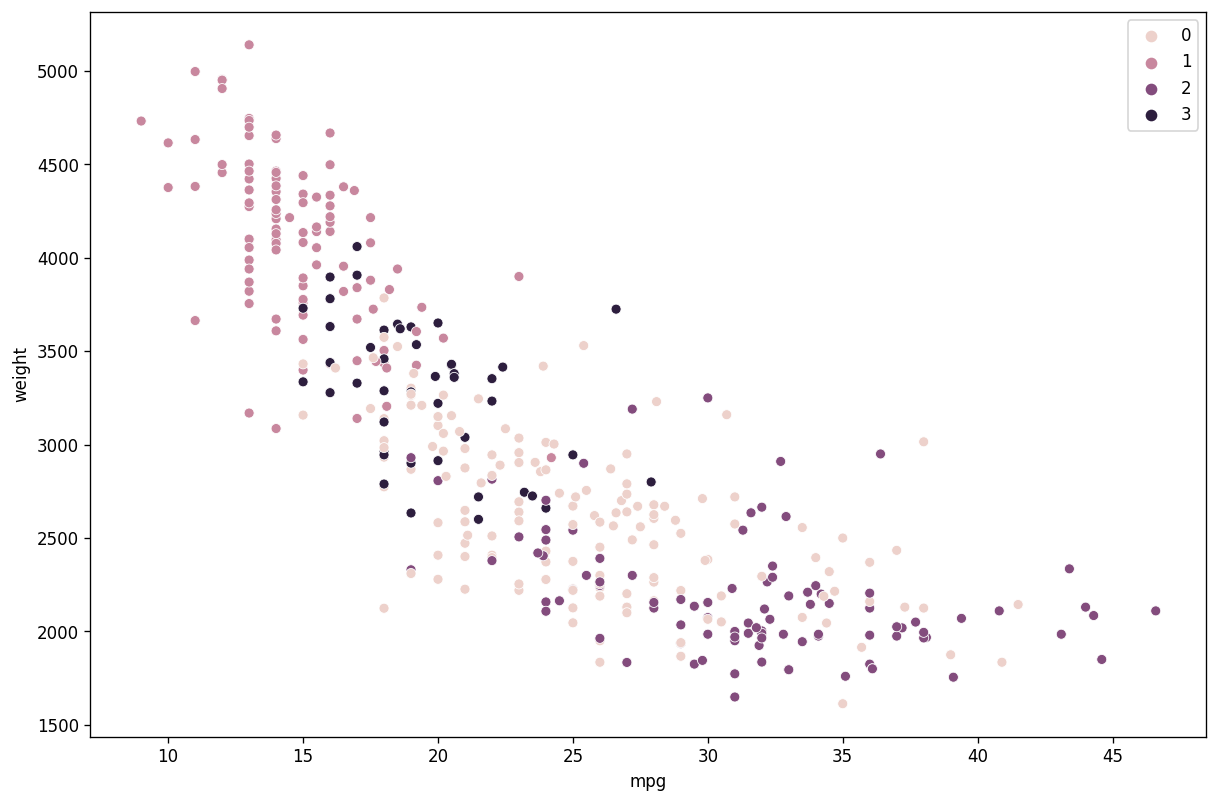

In [32]:
plt.figure(figsize=(12,8),dpi=120)
sns.scatterplot(data=df,x='mpg',y='weight',hue=cluster_labels)

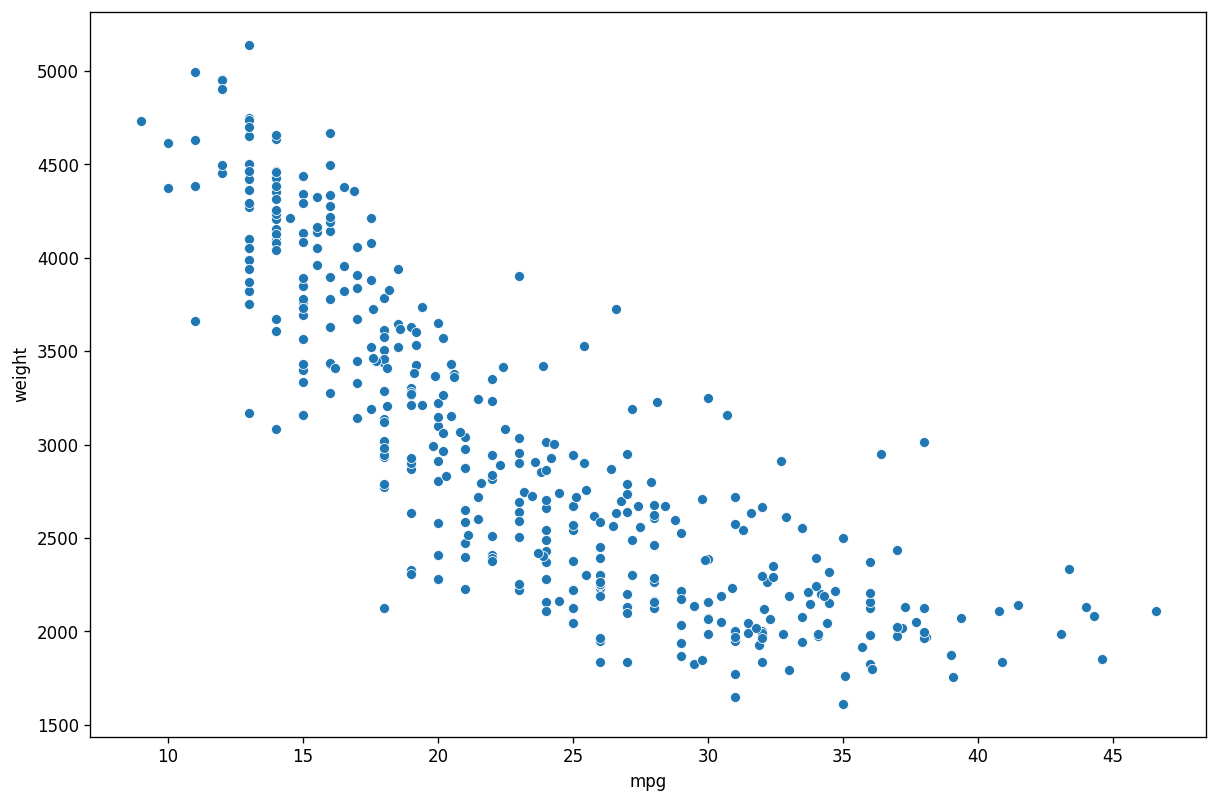

In [33]:
plt.figure(figsize=(12,8),dpi=120)
sns.scatterplot(data=df,x='mpg',y='weight',palette='viridis')

In [34]:
len(scaled_df.columns)

101

In [35]:
np.sqrt(10)

3.1622776601683795

In [38]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [39]:
model

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

In [40]:
cluster_labels = model.fit_predict(scaled_df)

In [41]:
cluster_labels

array([254, 280, 377, 304, 319, 239, 371, 243, 249, 235, 202, 205, 240,
       379, 352, 209, 207, 381, 383, 273, 277, 320, 203, 380, 375, 211,
       215, 378, 384, 385, 238, 252, 351, 256, 229, 396, 386, 390, 373,
       372, 376, 354, 281, 294, 279, 321, 314, 392, 318, 303, 264, 389,
       233, 261, 359, 327, 227, 322, 334, 187, 309, 394, 299, 353, 397,
       296, 364, 210, 355, 241, 285, 219, 282, 374, 301, 357, 358, 198,
       217, 287, 216, 311, 269, 206, 300, 333, 191, 395, 102, 290, 230,
       149, 323, 356, 329, 275, 306, 297, 360, 192, 286, 295, 166, 298,
       204, 363, 139, 234, 213, 293, 212, 305, 263, 315, 271, 259, 199,
       307, 178, 339, 268, 341, 232, 391, 228, 343, 313, 188, 302, 250,
       283, 325, 278, 316, 177, 348, 308, 330, 350, 226, 246, 152, 340,
       242, 223, 367, 116, 255, 336, 164, 159, 231, 347, 369, 173, 160,
       272, 151, 346, 101, 292, 266, 324, 289, 267, 260, 220, 185, 224,
        95, 176, 344, 218, 119, 221, 382, 169, 200, 237, 148, 25

In [43]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [44]:
linkage_matrix = hierarchy.linkage(model.children_)

In [45]:
linkage_matrix

array([[ 24.        ,  26.        ,   1.41421356,   2.        ],
       [148.        , 154.        ,   1.41421356,   2.        ],
       [103.        , 116.        ,   1.41421356,   2.        ],
       ...,
       [725.        , 789.        ,  70.22819946, 393.        ],
       [319.        , 790.        ,  70.60453243, 394.        ],
       [748.        , 791.        ,  88.05112151, 397.        ]])

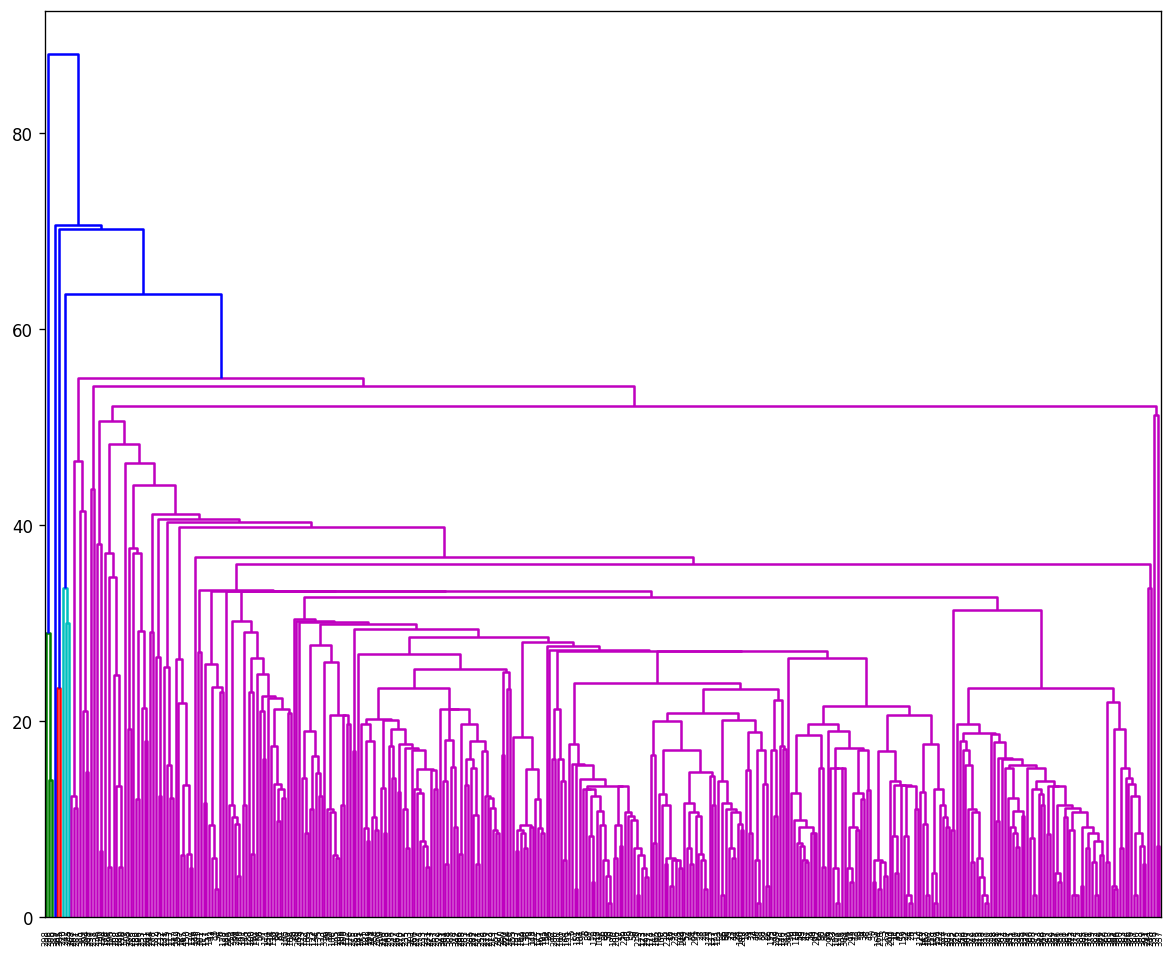

In [47]:
plt.figure(figsize=(12,10),dpi=120)
dendro = dendrogram(linkage_matrix)

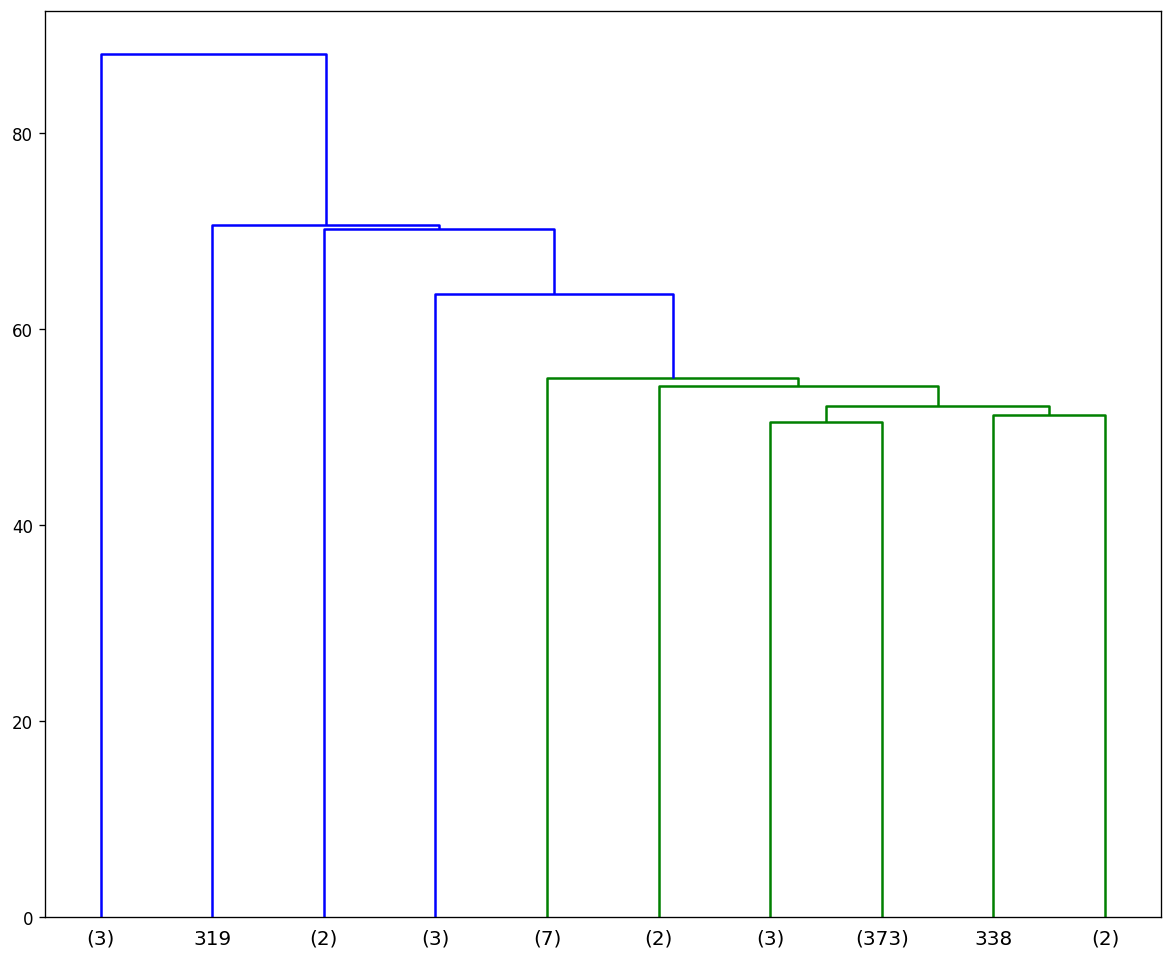

In [48]:
plt.figure(figsize=(12,10),dpi=120)
dendro = dendrogram(linkage_matrix,truncate_mode='lastp',p=10)

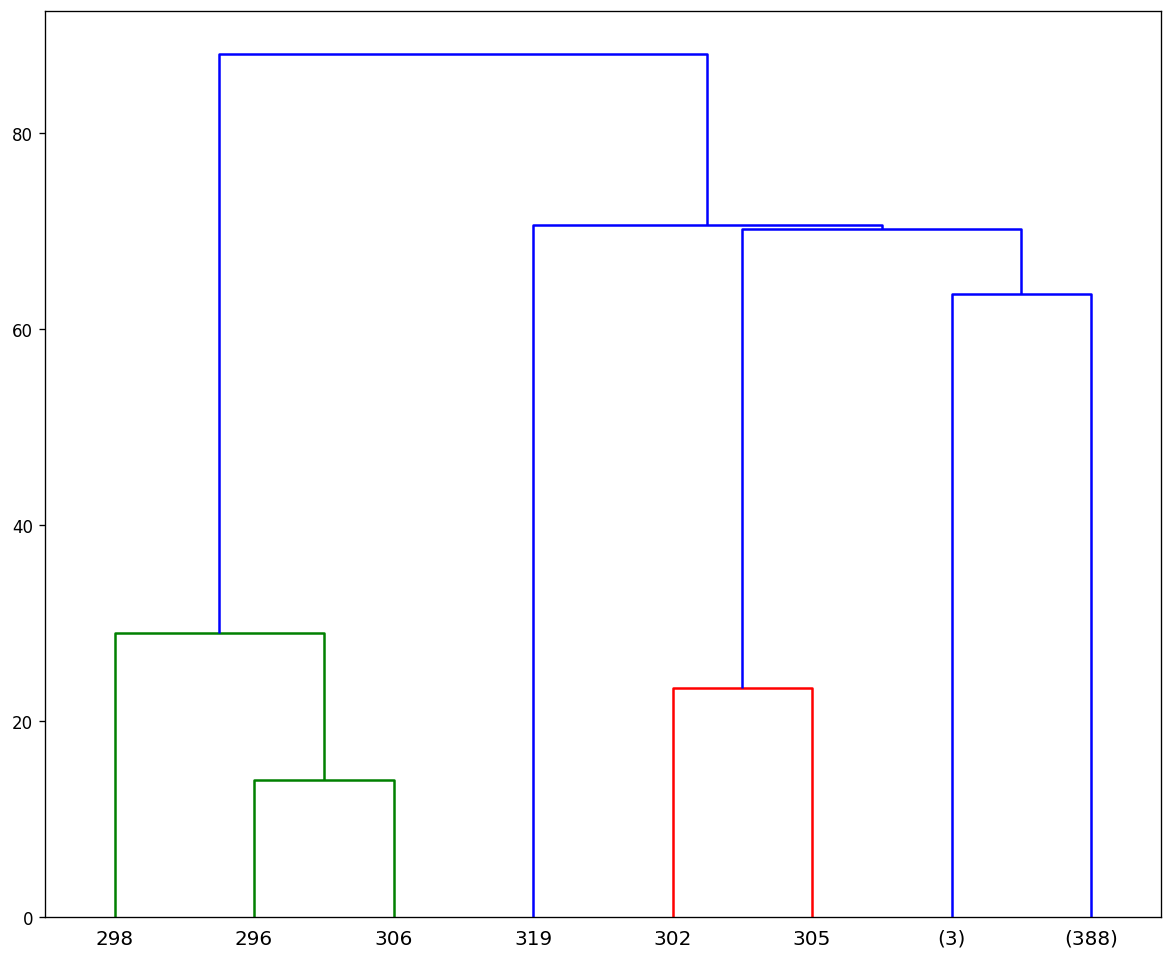

In [50]:
plt.figure(figsize=(12,10),dpi=120)
dendro = dendrogram(linkage_matrix,truncate_mode='level',p=3)

In [52]:
scaled_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin,horsepower_100,horsepower_102,horsepower_103,horsepower_105,horsepower_107,horsepower_108,horsepower_110,horsepower_112,horsepower_113,horsepower_115,horsepower_116,horsepower_120,horsepower_122,horsepower_125,horsepower_129,horsepower_130,horsepower_132,horsepower_133,horsepower_135,horsepower_137,horsepower_138,horsepower_139,horsepower_140,horsepower_142,horsepower_145,horsepower_148,horsepower_149,horsepower_150,horsepower_152,horsepower_153,horsepower_155,horsepower_158,horsepower_160,...,horsepower_58,horsepower_60,horsepower_61,horsepower_62,horsepower_63,horsepower_64,horsepower_65,horsepower_66,horsepower_67,horsepower_68,horsepower_69,horsepower_70,horsepower_71,horsepower_72,horsepower_74,horsepower_75,horsepower_76,horsepower_77,horsepower_78,horsepower_79,horsepower_80,horsepower_81,horsepower_82,horsepower_83,horsepower_84,horsepower_85,horsepower_86,horsepower_87,horsepower_88,horsepower_89,horsepower_90,horsepower_91,horsepower_92,horsepower_93,horsepower_94,horsepower_95,horsepower_96,horsepower_97,horsepower_98,horsepower_?
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.386026,0.490955,0.324098,0.384867,0.450482,0.500838,0.286432,0.042714,0.002513,0.002513,0.030151,0.002513,0.002513,0.045226,0.007538,0.002513,0.012563,0.002513,0.010050,0.002513,0.007538,0.005025,0.012563,0.002513,0.002513,0.002513,0.002513,0.002513,0.005025,0.017588,0.002513,0.017588,0.002513,0.002513,0.055276,0.002513,0.005025,0.005025,0.002513,0.005025,...,0.005025,0.012563,0.002513,0.005025,0.007538,0.002513,0.025126,0.002513,0.030151,0.015075,0.007538,0.030151,0.012563,0.015075,0.007538,0.035176,0.010050,0.002513,0.015075,0.005025,0.017588,0.005025,0.002513,0.010050,0.015075,0.022613,0.012563,0.005025,0.047739,0.002513,0.050251,0.002513,0.015075,0.002513,0.002513,0.035176,0.007538,0.022613,0.005025,0.015075
std,0.207872,0.340201,0.269431,0.240103,0.164148,0.308136,0.401027,0.202465,0.050125,0.050125,0.171217,0.050125,0.050125,0.208061,0.086601,0.050125,0.111518,0.050125,0.099871,0.050125,0.086601,0.070799,0.111518,0.050125,0.050125,0.050125,0.050125,0.050125,0.070799,0.131614,0.050125,0.131614,0.050125,0.050125,0.228807,0.050125,0.070799,0.070799,0.050125,0.070799,...,0.070799,0.111518,0.050125,0.070799,0.086601,0.050125,0.156704,0.050125,0.171217,0.122006,0.086601,0.171217,0.111518,0.122006,0.086601,0.184456,0.099871,0.050125,0.122006,0.070799,0.131614,0.070799,0.050125,0.099871,0.122006,0.148854,0.111518,0.070799,0.213481,0.050125,0.218738,0.050125,0.122006,0.050125,0.050125,0.184456,0.086601,0.148854,0.070799,0.122006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [53]:
np.sqrt(len(scaled_df.columns))

10.04987562112089

In [56]:
scaled_df['mpg'].idxmax()


322

In [57]:
scaled_df['mpg'].idxmin()

28

In [58]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

In [59]:
distance = np.linalg.norm(car_a-car_b)

In [60]:
distance

2.363350704932205

In [61]:
car_a

mpg              0.744681
cylinders        0.200000
displacement     0.131783
weight           0.232776
acceleration     0.416667
                   ...   
horsepower_95    0.000000
horsepower_96    0.000000
horsepower_97    0.000000
horsepower_98    0.000000
horsepower_?     0.000000
Name: 320, Length: 101, dtype: float64

In [62]:
car_b

mpg              0.000000
cylinders        1.000000
displacement     0.609819
weight           0.884321
acceleration     0.625000
                   ...   
horsepower_95    0.000000
horsepower_96    0.000000
horsepower_97    0.000000
horsepower_98    0.000000
horsepower_?     0.000000
Name: 28, Length: 101, dtype: float64